# Amazon stock price analysis and forecasting

In [68]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
stock_data = yf.download("AMZN", start= "2023-04-01")
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2023-04-03 00:00:00+00:00,102.410004,102.410004,103.290001,101.430000,102.300003,41135700
2023-04-04 00:00:00+00:00,103.949997,103.949997,104.199997,102.110001,102.750000,48662500
2023-04-05 00:00:00+00:00,101.099998,101.099998,103.910004,100.750000,103.910004,45175400
2023-04-06 00:00:00+00:00,102.059998,102.059998,102.379997,99.800003,100.750000,43808000
2023-04-10 00:00:00+00:00,102.169998,102.169998,102.199997,99.570000,100.959999,37261200


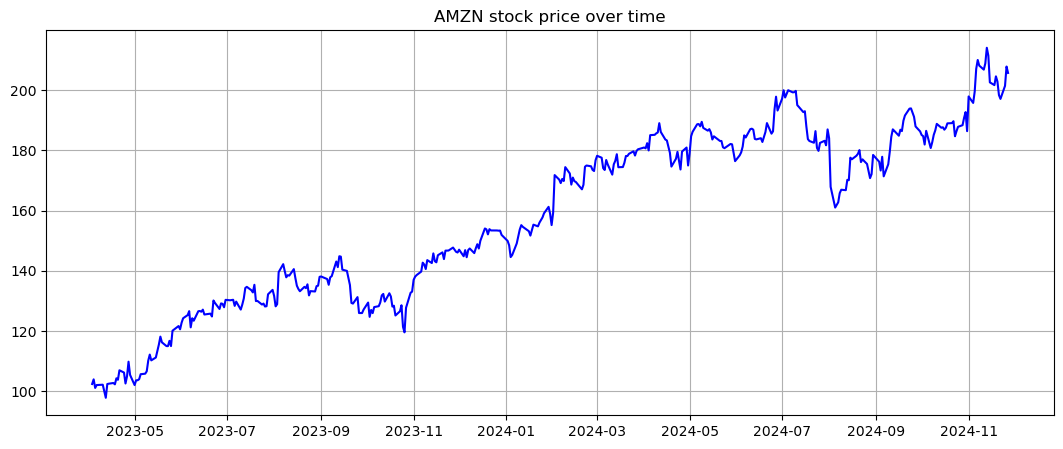

In [3]:
plt.figure(figsize= (13,5))
plt.title('AMZN stock price over time')
plt.plot(stock_data.index, stock_data['Close'], label= 'close price', color = '#0000FF')
plt.grid(True)
plt.show()

# Classical Time Series Decomposition

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

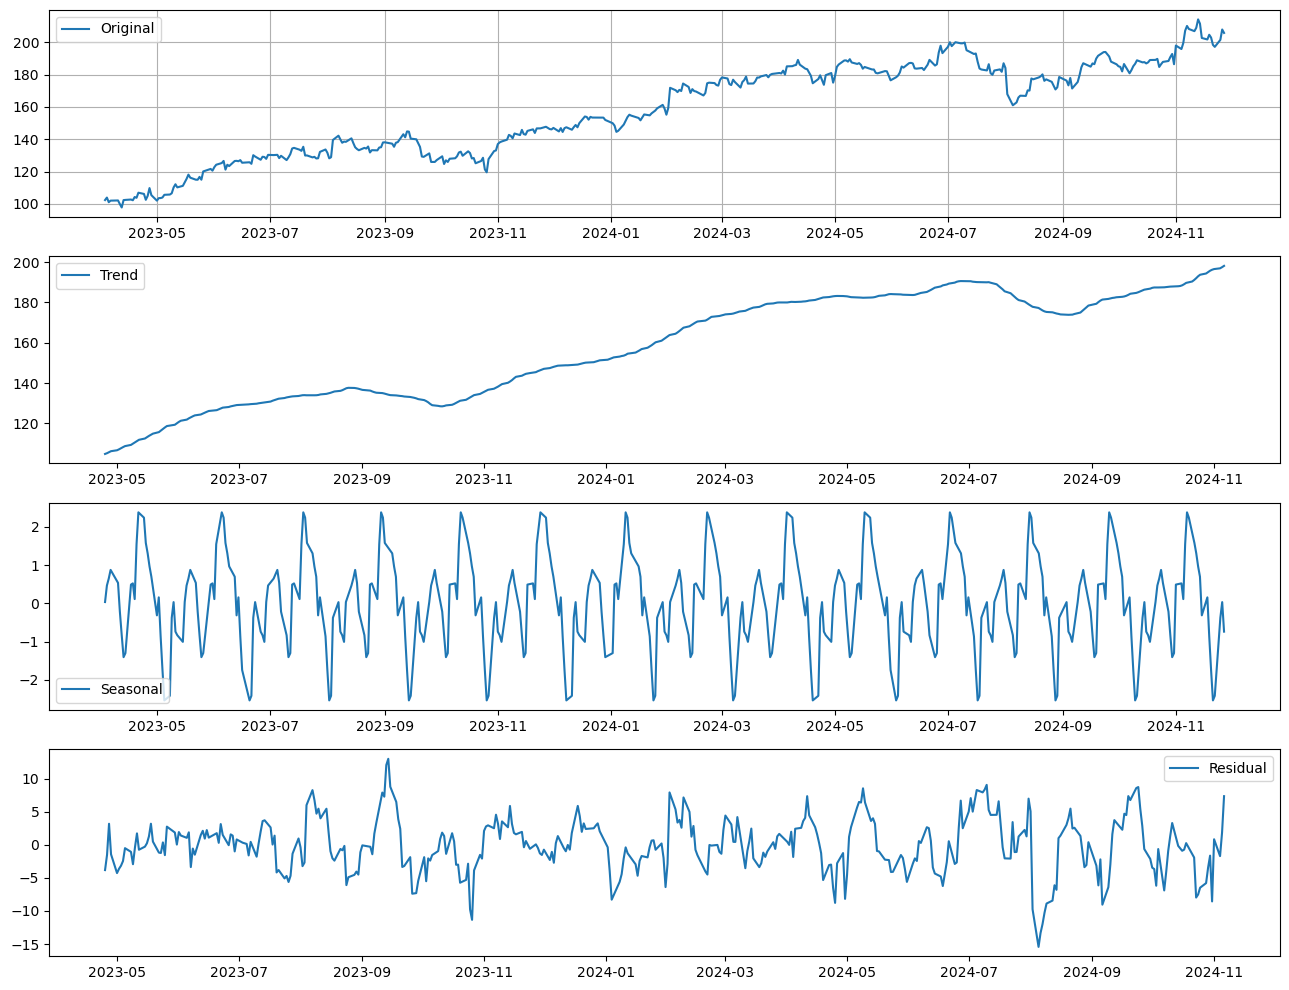

In [5]:
# Decompose the time series using additive model

classical = seasonal_decompose(stock_data['Close'], model= 'additive', period= 30)

trend = classical.trend
seasonal = classical.seasonal
residual = classical.resid

plt.figure(figsize= (13, 10))
plt.subplot(4,1,1)
plt.plot(stock_data['Close'], label= 'Original')
plt.grid(True)
plt.legend()

plt.subplot(4,1,2)
plt.plot(trend, label= 'Trend')
plt.legend()

plt.subplot(4,1,3)
plt.plot(seasonal, label= 'Seasonal')
plt.legend()

plt.subplot(4,1,4)
plt.plot(residual, label= 'Residual')
plt.legend()
plt.tight_layout()

- **The seasonal pattern is getting repeated on every 60 days**

# STL Time Series Decomposition

In [6]:
from statsmodels.tsa.seasonal import STL

In [7]:
stl = STL(stock_data['Close'].squeeze(), period= 30)                 # .squeeze() ensures it's 1D
result = stl.fit()

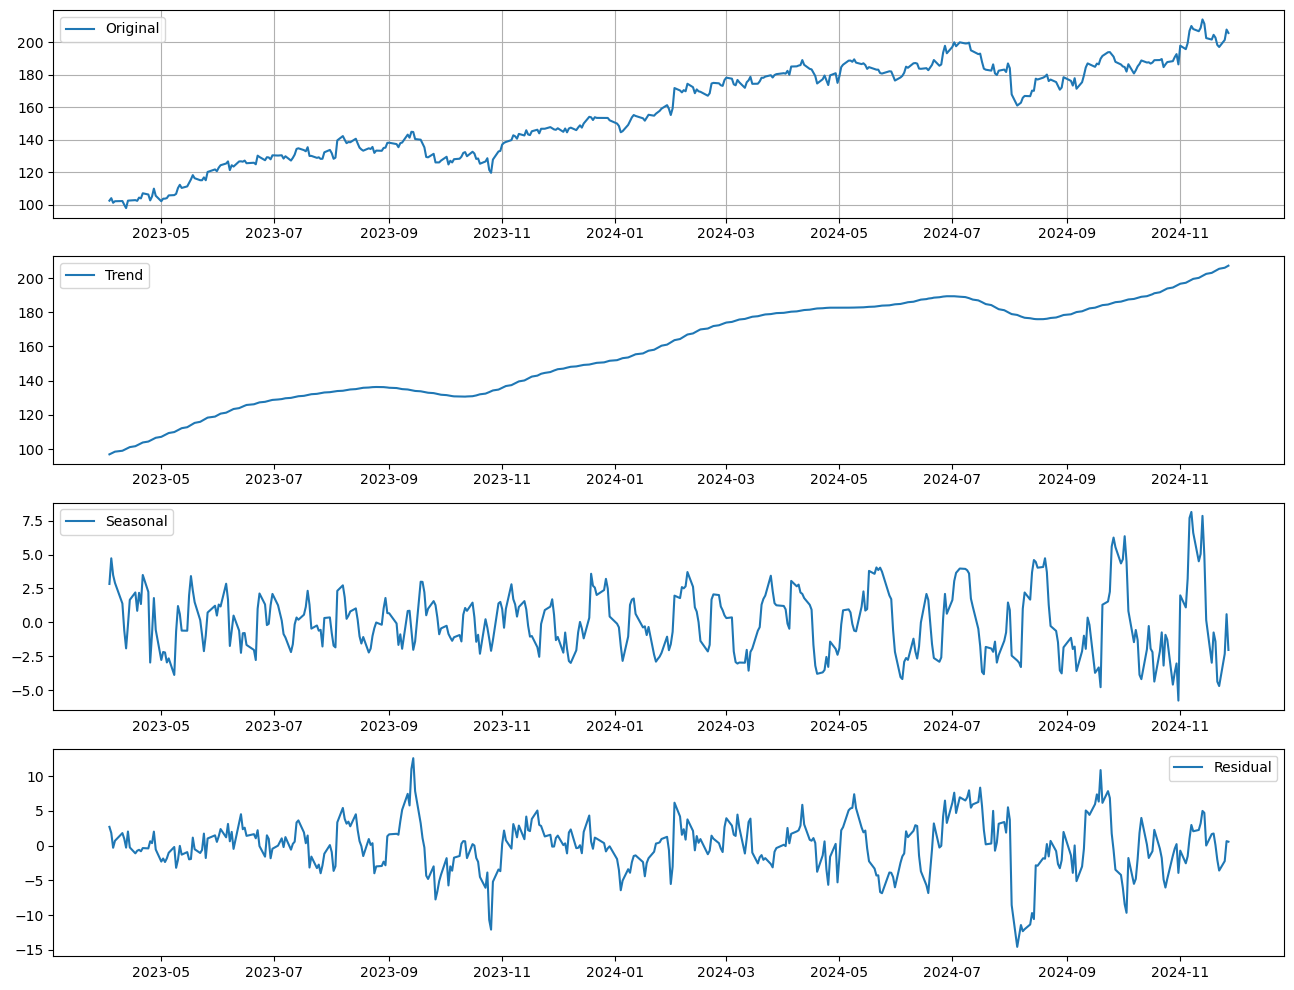

In [8]:
plt.figure(figsize= (13,10))
plt.subplot(4,1,1)
plt.plot(result.observed, label= 'Original')
plt.legend()
plt.grid(True)

plt.subplot(4,1,2)
plt.plot(result.trend, label= 'Trend')
plt.legend()

plt.subplot(4,1,3)
plt.plot(result.seasonal, label= 'Seasonal')
plt.legend()

plt.subplot(4,1,4)
plt.plot(result.resid, label= 'Residual')
plt.legend()
plt.tight_layout()

# Weak stationarity test

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

# Strict stationarity test

**Kolmogorov-Smirnov (K-S) test**

In [10]:
import numpy as np
from scipy.stats import ks_2samp

# Making data stationary

**Performing ADF and KPSS tests**

In [11]:
def adf_test(series):
    result = adfuller(series)
    print(f'ADF statistics: {round(result[0], 3)}')
    print(f'p value: {round(result[1], 4)}')
    for key, value in result[4].items():
        print(f'Critical value: {key} : {round(value, 3)}')

In [12]:
def kpss_test(series):
    result = kpss(series, regression= 'c')
    print(f'kpss statistics: {round(result[0], 3)}')
    print(f'p value: {round(result[1], 3)}')
    for key, value in result[3].items():
        print(f'Critical value: {key} : {round(value, 3)}')

In [13]:
adf_test(stock_data['Close'])

ADF statistics: -1.213
p value: 0.6679
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


**1. Differencing**

In [14]:
price_diff = stock_data['Close'].diff()
price_diff.head()

Ticker,AMZN
Date,
2023-04-03 00:00:00+00:00,NaN
2023-04-04 00:00:00+00:00,1.539993
2023-04-05 00:00:00+00:00,-2.849998
2023-04-06 00:00:00+00:00,0.959999
2023-04-10 00:00:00+00:00,0.110001


In [15]:
adf_test(price_diff.dropna())

ADF statistics: -17.006
p value: 0.0
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


In [16]:
 0.0 < 0.05

True

**Since, p value < significance value (0.05)**

**Series has become stationary by using Differencing method**

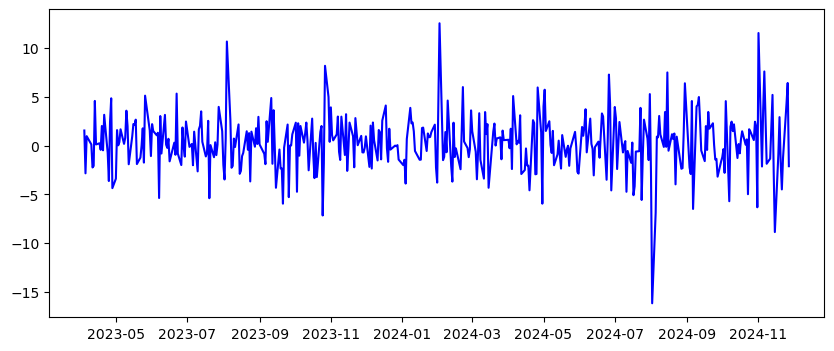

In [17]:
plt.figure(figsize= (10,4))
plt.plot(price_diff.dropna(), color= '#0000FF')

**2. Transformation**

In [18]:
from scipy.stats import boxcox

In [19]:
# Log transformation
prices_log = np.log(stock_data['Close'])

# Square root transformation
prices_sqrt = np.sqrt(stock_data['Close'])

# Box-Cox transformation
# Note: Box-Cox requires all positive values

prices = stock_data['Close'].squeeze()                         # .squeeze() ensures it's 1D

prices_boxcox, lam = boxcox(prices[prices > 0])

In [20]:
adf_test(prices_log)

ADF statistics: -1.701
p value: 0.4305
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


In [21]:
adf_test(prices_sqrt)

ADF statistics: -1.441
p value: 0.5624
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


In [22]:
adf_test(prices_boxcox)

ADF statistics: -1.031
p value: 0.7418
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


**Series is remains Non-stationary by using any of Transformation method because of High p value > 0.05**

**3. De-trending**

In [23]:
# Using a Linear trend to remove trend

from scipy.signal import detrend

prices = stock_data['Close'].squeeze()   
price_detrend = detrend(prices)

In [24]:
adf_test(price_detrend)

ADF statistics: -2.766
p value: 0.0633
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


**Since, p value > significance value (0.05)**

**Series has not become Stationary by linear de-trending**

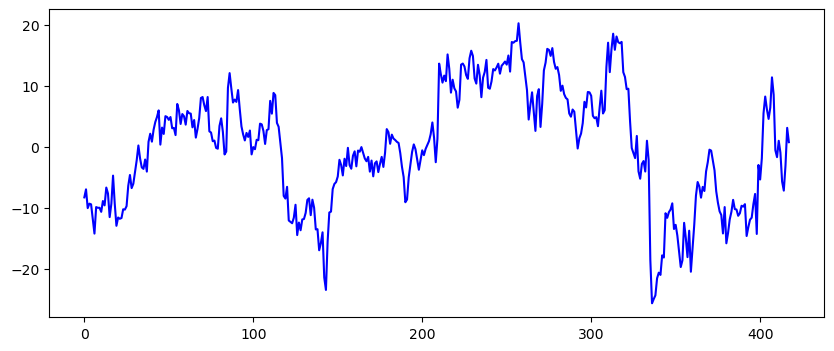

In [25]:
plt.figure(figsize= (10,4))
plt.plot(price_detrend, color= '#0000FF')

**Visually, it appears that the data's mean and variance fluctuate significantly over time, suggesting it might not be stationary.. we must consider next steps to confirm.**

In [26]:
# Using a moving average to remove trend

prices = stock_data['Close'].squeeze()   

prices_ma = prices.rolling(window= 12).mean()
prices_detrended = prices - prices_ma
prices_detrended

Date
2023-04-03 00:00:00+00:00         NaN
2023-04-04 00:00:00+00:00         NaN
2023-04-05 00:00:00+00:00         NaN
2023-04-06 00:00:00+00:00         NaN
2023-04-10 00:00:00+00:00         NaN
                               ...   
2024-11-21 00:00:00+00:00   -8.022495
2024-11-22 00:00:00+00:00   -8.451672
2024-11-25 00:00:00+00:00   -3.405003
2024-11-26 00:00:00+00:00    3.031667
2024-11-27 00:00:00+00:00    1.003338
Name: AMZN, Length: 418, dtype: float64

In [27]:
prices_detrended = prices_detrended.dropna()
adf_test(prices_detrended)

ADF statistics: -4.426
p value: 0.0003
Critical value: 1% : -3.447
Critical value: 5% : -2.869
Critical value: 10% : -2.571


**Since, p value < significance value (0.05)**

**Series has become Stationary by Moving average de-trending**

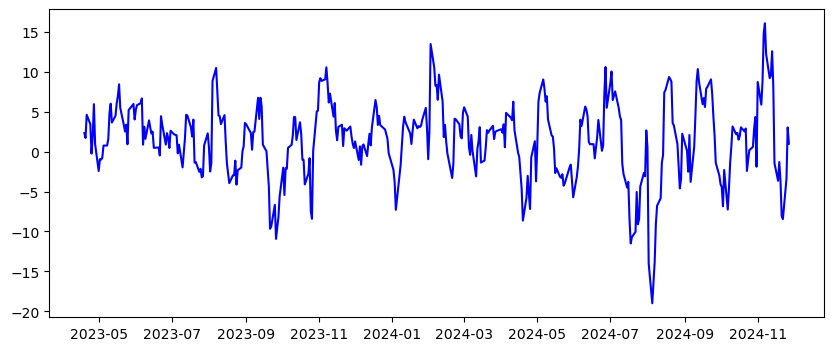

In [28]:
plt.figure(figsize= (10,4))
plt.plot(prices_detrended, color= '#0000FF')

**From the visual inspection of this graph, it appears to be Stationary.**

# White Noise and Random Walk  

In [29]:
from statsmodels.stats.diagnostic import acorr_ljungbox

**Ljung-Box test is a statistical test that checks whether a time series is white noise.**

- Null Hypothesis        (H0) : The time series is white noise (No autocorrelations).

- Alternative Hypothesis (H1) : The time series is not white noise (there are autocorrelations).


**If p-value > 0.05, Accept (H0), The time series is white noise (No autocorrelations).**

**If p-value < 0.05, Reject (H0), The time series is not white noise (there are autocorrelations).**

In [30]:
acorr_ljungbox(stock_data['Close'], lags= 10, return_df= True)

,lb_stat,lb_pvalue
1,410.379160,3.031051e-91
2,811.179978,7.153292e-177
3,1204.119014,9.365118e-261
4,1589.590685,0.000000e+00
5,1966.859995,0.000000e+00
6,2335.050159,0.000000e+00
7,2693.960144,0.000000e+00
8,3045.169835,0.000000e+00
9,3388.700197,0.000000e+00
10,3724.249333,0.000000e+00


**lags= 10 parameter, specifies the number of lags for which you want to test autocorrelation.**
**so, it checks for autocorrelations at up to the 10th lag.**

**return_df= True:   Returns the result as a DataFrame for easier reading.**

- at 10th lag, lb_pvalue < significance value (0.05), **means there are autocorrelations (Not White noise)**

# Time Series Forecasting Models

# ACF and PACF Plot (Auto Correlation Function & Partial Auto Correlation Funtion)

In [31]:
stock_data = yf.download("AMZN", start= "2023-04-01")

# making data stationary before model fitting

stationary_df = stock_data['Close'].diff().dropna()

[*********************100%***********************]  1 of 1 completed


In [32]:
adf_test(stationary_df)

ADF statistics: -17.006
p value: 0.0
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


**Since, p value < significance value (0.05), the series has become Stationary**

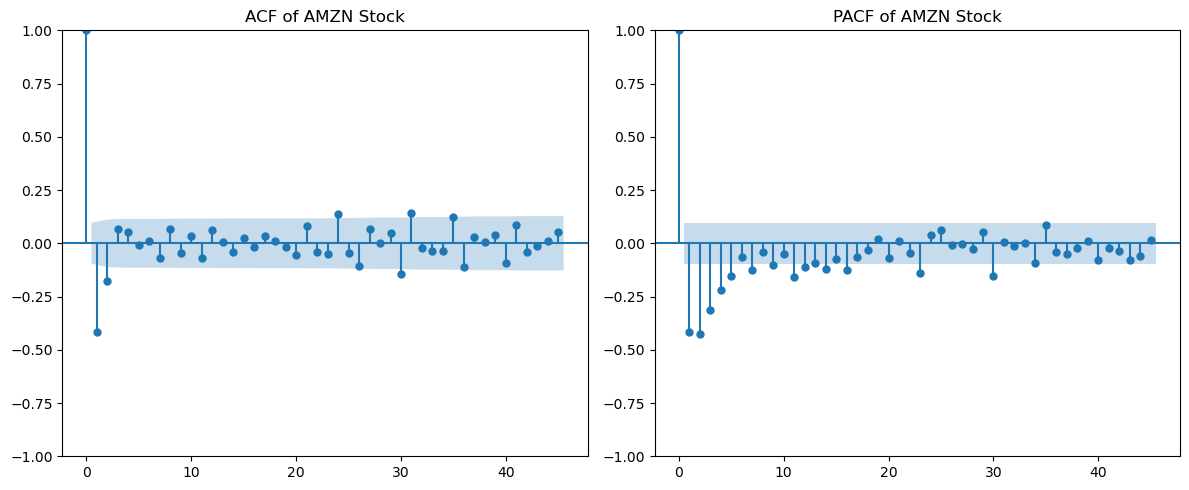

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize= (12,5))

ax1 = plt.subplot(1,2,1)
plot_acf(stationary_df.diff().dropna(), ax= ax1, lags= 45)
plt.title('ACF of AMZN Stock')

ax2 = plt.subplot(1,2,2)
plot_pacf(stationary_df.diff().dropna(), ax= ax2, lags= 45)
plt.title('PACF of AMZN Stock')

plt.tight_layout()

- **in ACF plot, its showing a sharp cut off after 2 lag and PACF plot showing gradually decrease, so its ideal for MA model.**

# AR Model (Auto Regressive)

- Split the data into **training** and **testing** datasets

In [34]:
# Ensure that index has frequency information

stationary_df = stationary_df.asfreq('B')      # Business days

stationary_df = stationary_df.fillna(method= 'ffill')

In [35]:
train_data, test_data = stationary_df[:-45], stationary_df[-45:]

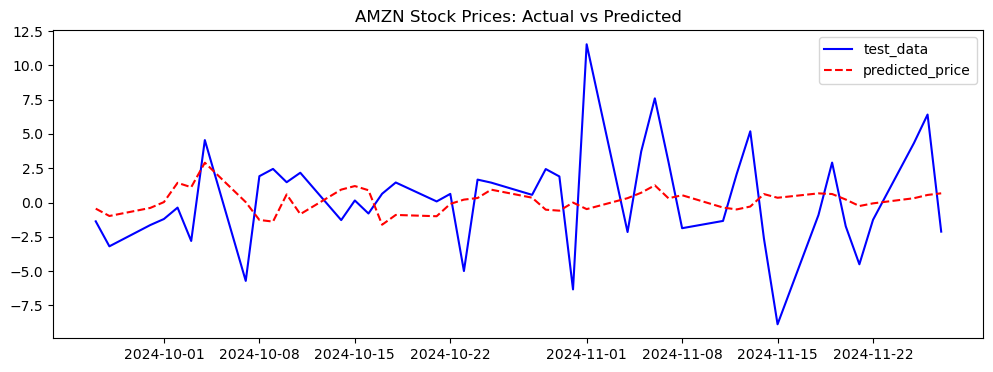

In [36]:
from statsmodels.tsa.ar_model import AutoReg

# Fit the Autoregressive model (AR) to the training data

model = AutoReg(train_data, lags= 30)   # Use lags = 30 based on PACF plot
model_fit = model.fit()

# Make predictions on the test data

prediction = model_fit.predict(start= len(train_data),
                               end= len(train_data) + len(test_data) - 1,
                               dynamic= False)

# Plot the actual vs predicted values on the test_data

plt.figure(figsize= (12,4))
plt.plot(test_data.index, test_data, label= 'test_data', color= '#0000FF')
plt.plot(test_data.index, prediction, label= 'predicted_price', color= 'red', linestyle= '--')
plt.title('AMZN Stock Prices: Actual vs Predicted')
plt.legend()
plt.show()

In [37]:
# aic & bic

aic = model_fit.aic
bic = model_fit.bic

print(f'AIC: {aic}')
print(f'BIC: {bic}')

AIC: 1762.8790477341877
BIC: 1886.9665927511362


In [38]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

mae = mean_absolute_error(test_data, prediction)
print(f'mean absolute error: {round(mae, 3)}')

mse = mean_squared_error(test_data, prediction)
print(f'mean squared error: {round(mse, 3)}')

rmse = np.sqrt(mse)
print(f'root mean square error: {round(rmse, 3)}')

mean absolute error: 2.986
mean squared error: 14.176
root mean square error: 3.765


- **Calculate the range of the stock prices as the difference between the maximum and minimum prices**

Then, calculate the Percentage of Range as:

**Percentage of Range = (RMSE / Range) × 100**

- subtract the Percentage of Range from 100 to get the Model Accuracy:

**Model Accuracy = 100 - Percentage of Range**

In [39]:
max_price = stock_data['Close'].max()
min_price = stock_data['Close'].min()

Range = max_price - min_price
rmse = 3.788

perc_of_range = (rmse / Range) * 100

prediction_accuracy = 100 - perc_of_range
print(f'prediction accuracy: {round(prediction_accuracy, 1)}%')

prediction accuracy: Ticker
AMZN    96.7
dtype: float64%


# MA Model (Moving Average)

in python, **to use MA Model, we can use ARIMA Model.**
**- ARIMA(p, d, q)**

- p = number of lagged observations (AR terms)
- d = degree of differencing
- q = number of lagged residuals (MA terms)


**By setting, p = 0, d = 0 the ARIMA class behaves exactly like a MA model.**

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dynamics']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


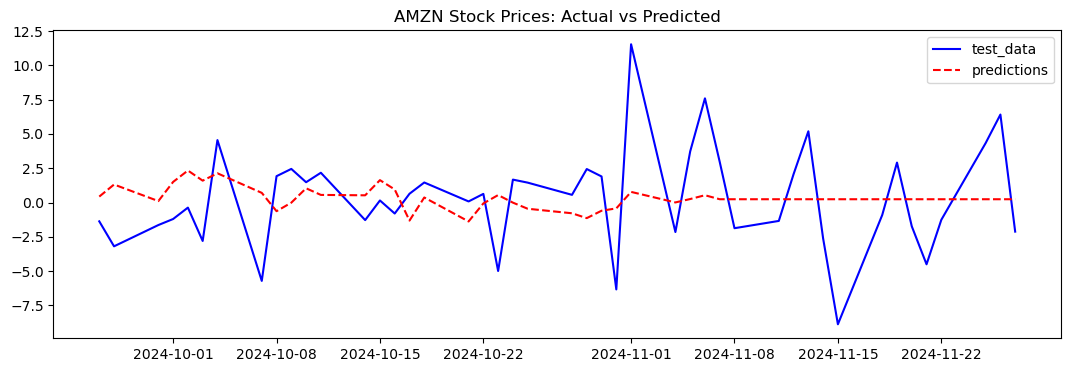

In [40]:
from statsmodels.tsa.arima.model import ARIMA

# fitting MA model to the training data

model2 = ARIMA(train_data, order= (0, 0, 30))   # Use lags = 30 based on ACF plot
model2_fit = model2.fit()

# make predictions on the test data

prediction2 = model2_fit.predict(start= len(train_data),
                                 end= len(train_data) + len(test_data) - 1,
                                 dynamics= False)

# plot the Actual and predicted prices on the test data

plt.figure(figsize= (13,4))
plt.plot(test_data.index, test_data, label= 'test_data', color= '#0000FF')
plt.plot(test_data.index, prediction2, label= 'predictions', color= 'red', linestyle= '--')
plt.title('AMZN Stock Prices: Actual vs Predicted')
plt.legend()
plt.show()

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, prediction2)
print(f'mean absolute error: {round(mae, 3)}')

mse = mean_squared_error(test_data, prediction2)
print(f'mean squared error: {round(mse, 3)}')

rmse = np.sqrt(mse)
print(f'root mean square error: {round(rmse, 3)}')

mean absolute error: 3.104
mean squared error: 14.326
root mean square error: 3.785


In [42]:
max_price = stock_data['Close'].max()
min_price = stock_data['Close'].min()

Range = max_price - min_price
rmse = 3.759

perc_of_range = (rmse / Range) * 100

prediction_accuracy = 100 - perc_of_range
print(f'prediction accuracy: {round(prediction_accuracy, 1)}%')

prediction accuracy: Ticker
AMZN    96.8
dtype: float64%


# ARMA Model (Auto Regressive Moving Average)

in python, **to use ARMA Model, we can use ARIMA Model.**
**- ARIMA(p, d, q)**

- p = number of lagged observations (AR terms)
- d = degree of differencing
- q = number of lagged residuals (MA terms)


**By setting, d = 0 the ARIMA class behaves exactly like an ARMA model.**

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dynamics']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


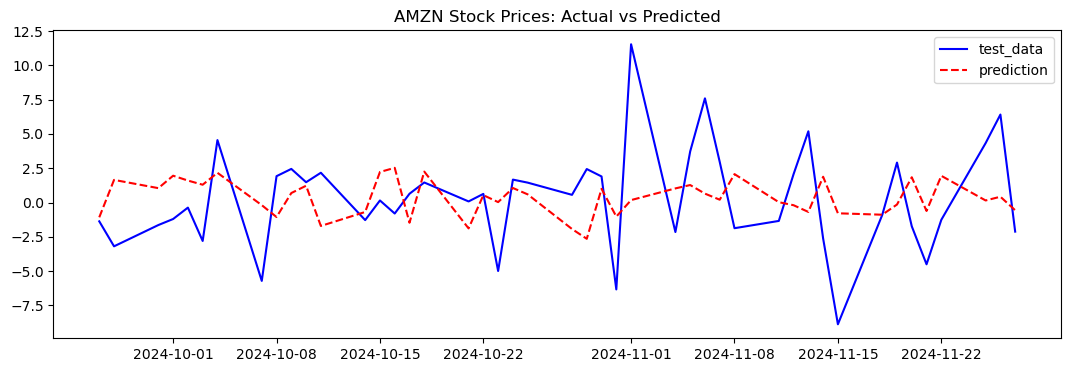

In [43]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARMA model to the training data

model3 = ARIMA(train_data, order= (30, 0, 30))  # p = 30 and q = 30 based on PACF and ACF plot
model3_fit = model3.fit()

# make predictions on the test data

prediction3 = model3_fit.predict(start= len(train_data),
                                end= len(train_data) + len(test_data) - 1,
                                dynamics= False)

# plot the Actual and predicted values on test data

plt.figure(figsize= (13, 4))
plt.plot(test_data.index, test_data, label= 'test_data', color= '#0000FF')
plt.plot(test_data.index, prediction3, label= 'prediction', color= 'red', linestyle= '--')
plt.title('AMZN Stock Prices: Actual vs Predicted')
plt.legend()
plt.show()

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, prediction3)
print(f'mean absolute error: {round(mae, 3)}')

mse = mean_squared_error(test_data, prediction3)
print(f'mean squared error: {round(mse, 3)}')

rmse = np.sqrt(mse)
print(f'root mean square error: {round(rmse, 3)}')

mean absolute error: 3.182
mean squared error: 15.18
root mean square error: 3.896


In [45]:
max_price = stock_data['Close'].max()
min_price = stock_data['Close'].min()

Range = max_price - min_price
rmse = 3.901

perc_of_range = (rmse / Range) * 100

prediction_accuracy = 100 - perc_of_range
print(f'prediction accuracy: {round(prediction_accuracy, 1)}%')

prediction accuracy: Ticker
AMZN    96.6
dtype: float64%


# ARIMA Model (Auto Regressive Integrated Moving Average)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['dynamics']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


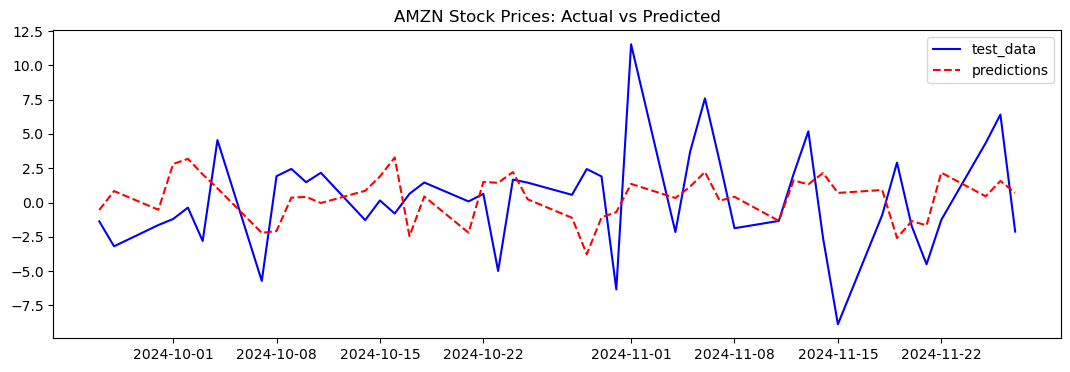

In [46]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting ARIMA model to the training data

model4 = ARIMA(train_data, order= (30, 1, 30))    # p = 30 and q = 30 based on PACF and ACF plot d = 1 (differencing)
model4_fit = model4.fit()

# make predictions on the test data

predictions4 = model4_fit.predict(start= len(train_data),
                                  end= len(train_data) + len(test_data) - 1,
                                  dynamics= False)


# plot the actual and predicted price on the test data

plt.figure(figsize= (13,4))
plt.plot(test_data.index, test_data, label= 'test_data', color= '#0000FF')
plt.plot(test_data.index, predictions4, label= 'predictions', color= 'red', linestyle= '--')
plt.title('AMZN Stock Prices: Actual vs Predicted')
plt.legend()
plt.show()

In [47]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, predictions4)
print(f'mean absolute error: {round(mae, 3)}')

mse = mean_squared_error(test_data, predictions4)
print(f'mean squared error: {round(mse, 3)}')

rmse = np.sqrt(mse)
print(f'root means square error: {round(rmse, 3)}')

mean absolute error: 3.212
mean squared error: 14.993
root means square error: 3.872


In [48]:
max_price = stock_data['Close'].max()
min_price = stock_data['Close'].min()

Range = max_price - min_price
rmse = 3.873

perc_of_range = (rmse / Range) * 100

prediction_accuracy = 100 - perc_of_range
print(f'prediction accuracy: {round(prediction_accuracy, 1)}%')

prediction accuracy: Ticker
AMZN    96.7
dtype: float64%


# SARIMA Model

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


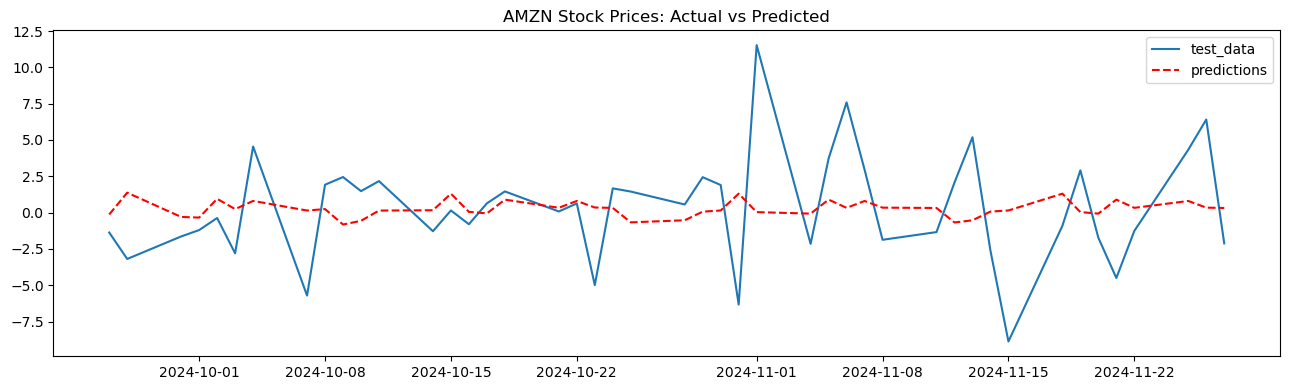

In [50]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit a SARIMA model on the train data

model5 = SARIMAX(train_data, order= (5, 0, 2), seasonal_order= (1, 1, 1, 12))    # p = 5, and q = 2 based or PACF and ACF plot

# we can keep both P and Q of seasonal_order as 0 or 1
# since, P and Q values are capturing from p and q of order
# s = 12 (monthly data)

model5_fit = model5.fit()

# Make prediction

predictions5 = model5_fit.predict(start= len(train_data),
                                  end= len(train_data) + len(test_data) - 1,
                                  dynamic= False)

plt.figure(figsize= (13,4))
plt.plot(test_data.index, test_data, label= 'test_data')
plt.plot(test_data.index, predictions5, label= 'predictions', color= 'red', linestyle= '--')
plt.title('AMZN Stock Prices: Actual vs Predicted')
plt.legend()
plt.tight_layout()

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, predictions5)
print(f'mean absolute error: {round(mae, 3)}')

mse = mean_squared_error(test_data, predictions5)
print(f'mean squared error: {round(mse, 3)}')

rmse = np.sqrt(mse)
print(f'root means square error: {round(rmse, 3)}')

mean absolute error: 2.965
mean squared error: 14.559
root means square error: 3.816


In [78]:
max_price = stock_data['Close'].max()
min_price = stock_data['Close'].min()

Range = max_price - min_price
rmse = 3.754

perc_of_range = (rmse / Range) * 100

prediction_accuracy = 100 - perc_of_range
print(f'prediction accuracy: {round(prediction_accuracy, 1)}%')

prediction accuracy: Ticker
AMZN    96.8
dtype: float64%


# VAR Model (Vector Auto Regressive)

In [53]:
stock_df = yf.download("AAPL", start= "2023-04-01")
stock_df2 = yf.download("TSLA", start= "2023-04-01")

stock_df['Tesla_close'] = stock_df2['Close']
stock_df['Apple_close'] = stock_df['Close'].shift()       # to get previous days values

stock_df.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume,Tesla_close,Apple_close
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL,,
Date,,,,,,,,
2023-04-03 00:00:00+00:00,164.691818,166.169998,166.289993,164.220001,164.270004,56976200,194.770004,NaN
2023-04-04 00:00:00+00:00,164.156647,165.630005,166.839996,165.110001,166.600006,46278300,192.580002,166.169998
2023-04-05 00:00:00+00:00,162.303268,163.759995,165.050003,161.800003,164.740005,51511700,185.520004,165.630005
2023-04-06 00:00:00+00:00,163.195251,164.660004,164.960007,162.000000,162.429993,45390100,185.059998,163.759995
2023-04-10 00:00:00+00:00,160.588669,162.029999,162.029999,160.080002,161.419998,47716900,184.509995,164.660004


- **Perform a Granger causality test to check whether a time series can be used to forecast / predict another time series or not.**

In [67]:
from statsmodels.tsa.stattools import grangercausalitytests

gct = grangercausalitytests(stock_df[['Apple_close', 'Tesla_close']].dropna(), maxlag= [14])
gct


Granger Causality
number of lags (no zero) 14
ssr based F test:         F=3.4117  , p=0.0000  , df_denom=374, df_num=14
ssr based chi2 test:   chi2=51.4669 , p=0.0000  , df=14
likelihood ratio test: chi2=48.4360 , p=0.0000  , df=14
parameter F test:         F=3.4117  , p=0.0000  , df_denom=374, df_num=14


{14: ({'ssr_ftest': (3.411664480088506, 3.183670217183561e-05, 374.0, 14),
   'ssr_chi2test': (51.46687432261858, 3.4604911167993227e-06, 14),
   'lrtest': (48.43595149014095, 1.113089133767441e-05, 14),
   'params_ftest': (3.4116644800886458, 3.183670217181519e-05, 374.0, 14.0)},
   array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
           0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
           0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
          [0., 0., 0., 

- **Since, p-values for all tests < significance value (0.05), the time series has granger causality dependence.**

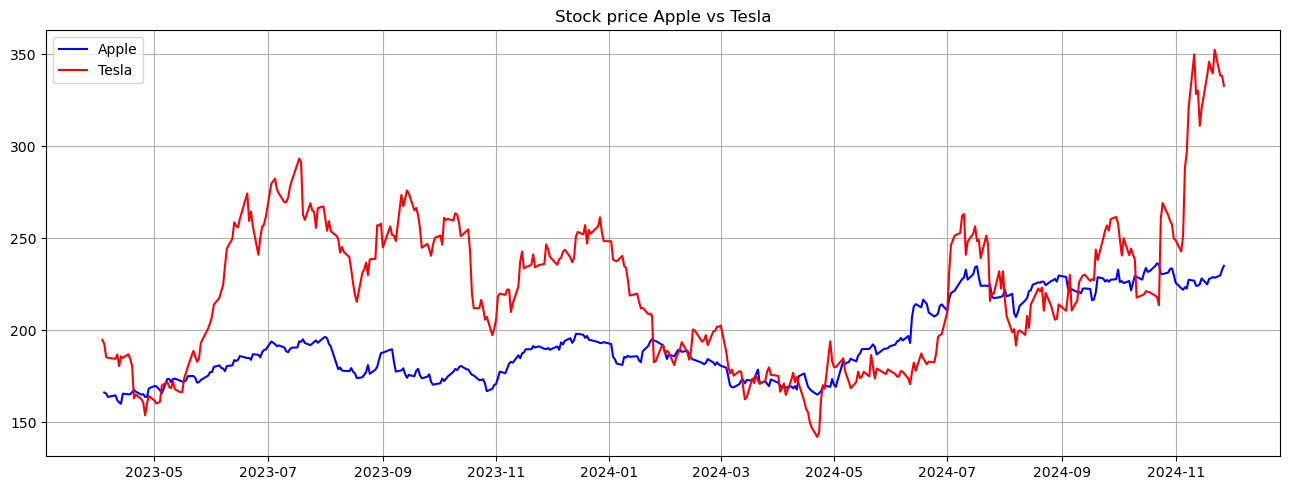

In [56]:
plt.figure(figsize= (13,5))
plt.plot(stock_df.index, stock_df['Apple_close'], label= 'Apple', color= 'blue')
plt.plot(stock_df.index, stock_df['Tesla_close'], label= 'Tesla', color= 'red')
plt.title('Stock price Apple vs Tesla')
plt.legend()
plt.grid(True)
plt.tight_layout()

In [58]:
adf_test(stock_df['Apple_close'].dropna())

ADF statistics: -0.916
p value: 0.7827
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


In [59]:
adf_test(stock_df['Tesla_close'])

ADF statistics: -1.162
p value: 0.6897
Critical value: 1% : -3.446
Critical value: 5% : -2.868
Critical value: 10% : -2.57


- **Making stationary**

In [60]:
stationary_df = stock_df[['Apple_close', 'Tesla_close']].diff().dropna()

In [61]:
adf_test(stationary_df['Apple_close'])

ADF statistics: -19.004
p value: 0.0
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


**Since, p value < significance value (0.05), the series has become Stationary**

In [62]:
adf_test(stationary_df['Tesla_close'])

ADF statistics: -19.831
p value: 0.0
Critical value: 1% : -3.446
Critical value: 5% : -2.869
Critical value: 10% : -2.57


**Since, p value < significance value (0.05), the series has become Stationary**

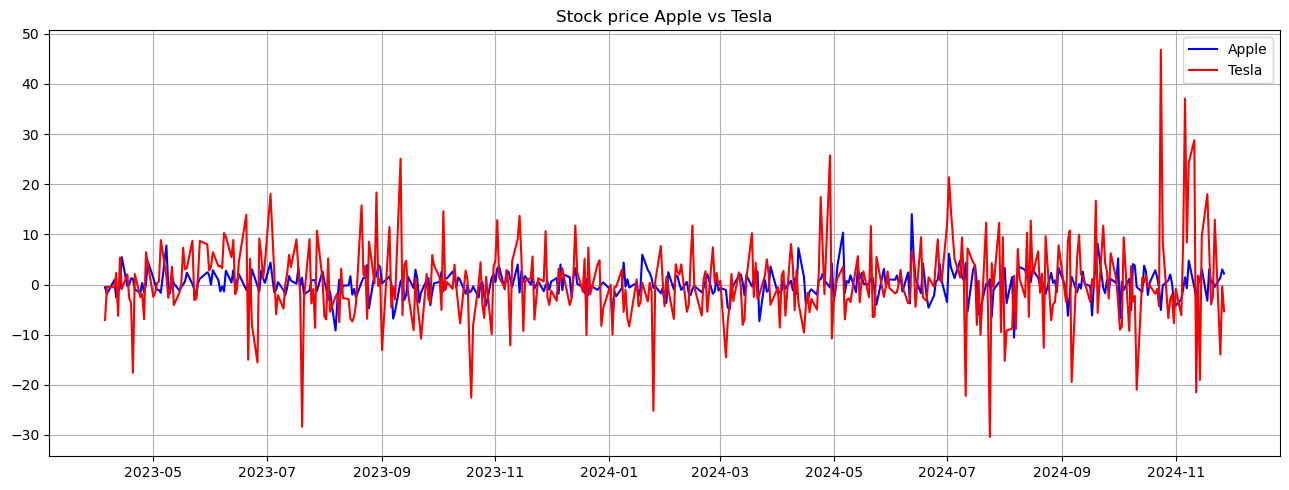

In [63]:
plt.figure(figsize= (13,5))
plt.plot(stationary_df.index, stationary_df['Apple_close'], label= 'Apple', color= 'blue')
plt.plot(stationary_df.index, stationary_df['Tesla_close'], label= 'Tesla', color= 'red')
plt.title('Stock price Apple vs Tesla')
plt.legend()
plt.grid(True)
plt.tight_layout()

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


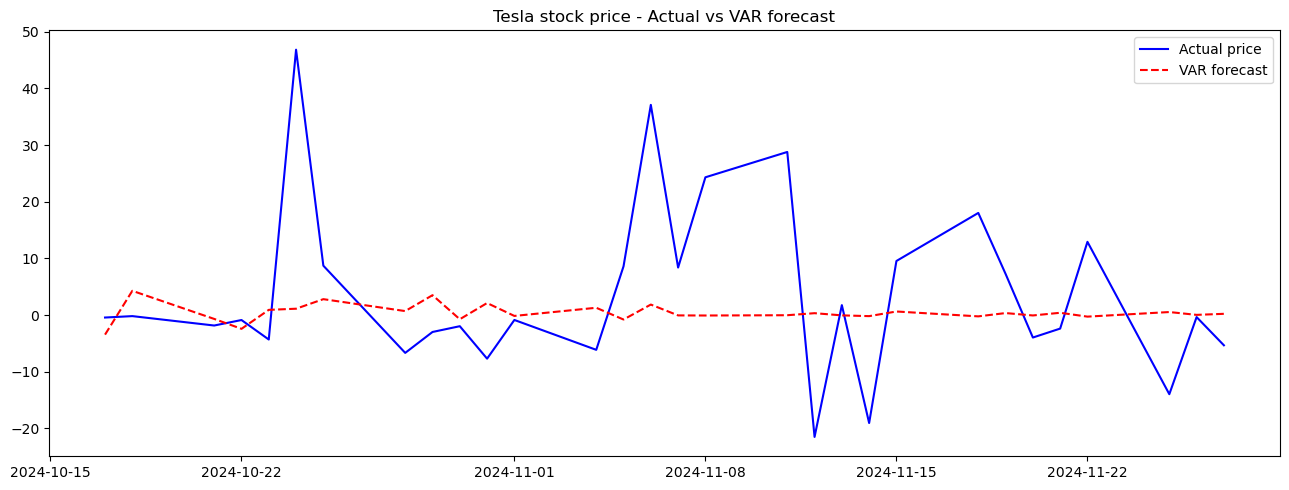

In [83]:
from statsmodels.tsa.api import VAR

train_data, test_data = stationary_df[:-30], stationary_df[-30:]

# Fit VAR model on train data

model = VAR(train_data)
model_fit = model.fit(maxlags= 14)

# Make predictions

predictions = model_fit.forecast(train_data.values, steps= len(test_data))
predictions = pd.DataFrame(predictions, index= test_data.index, columns= train_data.columns)

plt.figure(figsize= (13,5))
plt.plot(test_data.index, test_data['Tesla_close'], label= 'Actual price', color= 'blue')
plt.plot(test_data.index, predictions['Tesla_close'], label= 'VAR forecast', color= 'red', linestyle= '--')
plt.title('Tesla stock price - Actual vs VAR forecast')
plt.legend()
plt.tight_layout()

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, predictions)
print(f'mean absolute error: {round(mae, 3)}')

mse = mean_squared_error(test_data, predictions)
print(f'mean squared error: {round(mse, 3)}')

rmse = np.sqrt(mse)
print(f'root means square error: {round(rmse, 3)}')

mean absolute error: 6.321
mean squared error: 119.519
root means square error: 10.932


In [77]:
max_price = stock_df['Tesla_close'].max()
min_price = stock_df['Tesla_close'].min()

Range = max_price - min_price
rmse = 10.932

perc_of_range = (rmse / Range) * 100

prediction_accuracy = 100 - perc_of_range
print(f'prediction accuracy: {round(prediction_accuracy, 1)}%')

prediction accuracy: 94.8%


# VMA model (Vector Moving Average)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


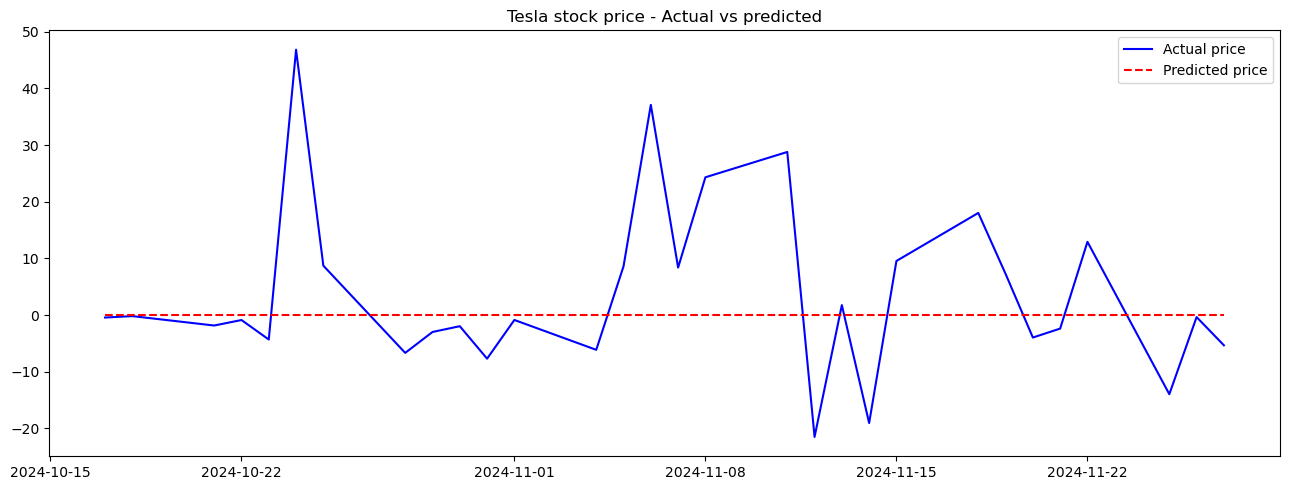

In [84]:
from statsmodels.tsa.api import VARMAX

# Fit a VARMAX model on the train data

model = VARMAX(train_data, order= (0, 14))
model_fit = model.fit()

# Make Predictions

predictt = model_fit.predict(start= len(train_data),
                             end= len(train_data) + len(test_data) - 1,
                             dynamic= False)

plt.figure(figsize= (13,5))
plt.plot(test_data.index, test_data['Tesla_close'], label= 'Actual price', color= 'blue')
plt.plot(test_data.index, predictt['Tesla_close'], label= 'Predicted price', color= 'red', linestyle= '--')
plt.title('Tesla stock price - Actual vs predicted')
plt.legend()
plt.tight_layout()

- **For VMA model**

**model = VARMAX(train_data, order= (p, q))**    

- **p = 0 (VAR Component): The model does not use past values of the dependent variables (y) for predictions. ince, x causes y**
- **q = 14 (MA Componen): This means the current value of the dependent variables depends on the previous 14 forecast errors.**

In [85]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(test_data, predictt)
print(f'mean absolute error: {round(mae, 3)}')

mse = mean_squared_error(test_data, predictt)
print(f'mean squared error: {round(mse, 3)}')

rmse = np.sqrt(mse)
print(f'root means square error: {round(rmse, 3)}')

mean absolute error: 6.146
mean squared error: 120.756
root means square error: 10.989


In [87]:
max_price = stock_df['Tesla_close'].max()
min_price = stock_df['Tesla_close'].min()

Range = max_price - min_price
rmse = 10.989

perc_of_range = (rmse / Range) * 100

prediction_accuracy = 100 - perc_of_range
print(f'prediction accuracy: {round(prediction_accuracy, 1)}%')

prediction accuracy: 94.8%
